
# Week 13: Mastering Tidy Data – Practical Transformations for Real-World Datasets

---

## What is tidy data?

**Tidy data** is a way of organizing datasets to make analysis intuitive. Its core principles:

- **Each variable is a column.**  
  (e.g., age, sales, temperature)

- **Each observation is a row.**  
  (e.g., a person, a time point, a transaction)

- **Each observational unit is a table.**  
  (e.g., customer data, weekly sales, weather data)

**Why does this matter?**

- Makes filtering, summarizing, and visualization straightforward.
- Ensures datasets work smoothly with common analysis tools.
- Supports reproducibility and sharing.

---

# 1. Wide-to-Long Format: Yearly Data

### Starting with data (simulating sales over years):

In [79]:
import pandas as pd

df1 = pd.DataFrame({
    'Product': ['Widget A', 'Widget B', 'Widget C', 'Widget D'],
    'Sales_2019': [500, 300, 450, 600],
    'Sales_2020': [550, 330, 460, 620],
    'Sales_2021': [600, 390, 480, 650]
})

### Goal:

Convert to tidy format — one row per product-year-sales.

In [80]:
# Use melt to reshape
long_df1 = pd.melt(df1, id_vars=['Product'],
                   value_vars=['Sales_2019', 'Sales_2020', 'Sales_2021'],
                   var_name='Year', value_name='Sales')

# Clean 'Year' column
long_df1['Year'] = long_df1['Year'].str.replace('Sales_', '')

long_df1

,Product,Year,Sales
0,Widget A,2019,500
1,Widget B,2019,300
2,Widget C,2019,450
3,Widget D,2019,600
4,Widget A,2020,550
5,Widget B,2020,330
6,Widget C,2020,460
7,Widget D,2020,620
8,Widget A,2021,600
9,Widget B,2021,390


**Student Activity:**  
*Now you try*—add another year (e.g., 2022) or product, and repeat the melt. Try changing the variable columns to include more metrics (like Units).

---

# 2. Variables in One Column: Separate into multiple

### Starting data (product details):

In [81]:
df2 = pd.DataFrame({
    'Product': ['Widget A', 'Widget B', 'Widget C', 'Widget D'],
    'Details': ['Price: 20, Qty: 5', 'Price: 15, Qty: 7', 'Price: 25, Qty: 3', 'Price: 30, Qty: 6']
})

### Goal:

Split the 'Details' string into separate numeric `Price` and `Qty` columns.

In [82]:
# Split Details
split_details = df2['Details'].str.split(', ', expand=True)

# Remove labels and convert
split_details['Price'] = split_details[0].str.replace('Price: ', '').astype(int)
split_details['Qty'] = split_details[1].str.replace('Qty: ', '').astype(int)

# Merge back
tidy_df2 = pd.concat([df2['Product'], split_details[['Price', 'Qty']]], axis=1)

tidy_df2

,Product,Price,Qty
0,Widget A,20,5
1,Widget B,15,7
2,Widget C,25,3
3,Widget D,30,6


**Student Activity:**  
*Now you try* — add more variables into the 'Details' column, e.g., "Revenue: 100", and split again.

---

# 3. Wide Format: Animal measurements

### Starting dataset:

In [83]:
df3 = pd.DataFrame({
    'Animal': ['Dog', 'Cat', 'Rabbit', 'Horse'],
    'Length': [60, 40, 30, 170],
    'Weight': [20, 10, 5, 500],
    'Height': [50, 30, 25, 160]
})

### Goal:

Transform into long format — one row per animal-measurement.

In [84]:
long_measures = pd.melt(df3, id_vars=['Animal'], 
                        value_vars=['Length', 'Weight', 'Height'],
                        var_name='MeasureType', value_name='Value')

long_measures

,Animal,MeasureType,Value
0,Dog,Length,60
1,Cat,Length,40
2,Rabbit,Length,30
3,Horse,Length,170
4,Dog,Weight,20
5,Cat,Weight,10
6,Rabbit,Weight,5
7,Horse,Weight,500
8,Dog,Height,50
9,Cat,Height,30


**Student Activity:**  
*Now you try* — add a new measurement type, such as "Speed", and melt again. Then, plot different measures.

---

# 4. String Data with Units

### Starting data (measurements with units):

In [85]:
df4 = pd.DataFrame({
    'Person': ['Alice', 'Bob', 'Charlie', 'Daisy'],
    'Data': ['170cm, 60kg', '180cm, 75kg', '165cm, 55kg', '160cm, 50kg']
})

### Goal:

Split into numeric height and weight, converting units to integers.

In [86]:
split_df4 = df4['Data'].str.split(', ', expand=True)
split_df4.columns = ['Height', 'Weight']

# Remove units and convert to int
split_df4['Height'] = split_df4['Height'].str.replace('cm', '').astype(int)
split_df4['Weight'] = split_df4['Weight'].str.replace('kg', '').astype(int)

# Combine back
tidy_people = pd.concat([df4['Person'], split_df4], axis=1)
tidy_people

,Person,Height,Weight
0,Alice,170,60
1,Bob,180,75
2,Charlie,165,55
3,Daisy,160,50


**Student Activity:**  
*Now you try* — convert height from cm to inches (`cm / 2.54`) and visualize the distribution.

---

# 5. Observations in Sections

### Starting dataset:

In [87]:
df5 = pd.DataFrame({
    'StudentID': [101, 102, 103, 104],
    'Session1': [85, 78, 92, 70],
    'Session2': [88, 80, 94, 72],
    'Session3': [90, 82, 96, 75]
})

### Goal:

Convert to long format: one row per student per session.

In [88]:
long_scores = pd.melt(df5, id_vars=['StudentID'], 
                      value_vars=['Session1', 'Session2', 'Session3'],
                      var_name='Session', value_name='Score')

long_scores['Session'] = long_scores['Session'].str.replace('Session', '')

long_scores

,StudentID,Session,Score
0,101,1,85
1,102,1,78
2,103,1,92
3,104,1,70
4,101,2,88
5,102,2,80
6,103,2,94
7,104,2,72
8,101,3,90
9,102,3,82


**Student Activity:**  
*Now you try* — add `Session4` and melt again. Calculate the average score per session.

---

# 6. How to convert pandas DataFrame column to numpy array and back

### a) From pandas to numpy

In [89]:
x = range(10)
y = range(10)
df = pd.DataFrame({"x":[*x], "y":[*y]})


# Try picking a column and convert to numpy, how does that change the shape?
x = df.to_numpy()
print('Shape:', x.shape)

Shape: (10, 2)


### b) From numpy to pandas

In [90]:
import numpy as np
# Generate numpy data
np_x = np.linspace(0, 2*np.pi, 100)

# Convert to pandas DataFrame
df_x = pd.DataFrame({'x': np_x, 'cos_x': np.cos(np_x)})
df_x.head()

,x,cos_x
0,0.000000,1.000000
1,0.063467,0.997987
2,0.126933,0.991955
3,0.190400,0.981929
4,0.253866,0.967949


**Prompt:**  
*Now you try* — pick a column from your DataFrame, convert it to numpy using `.values` or `.to_numpy()`.  
Then, generate a numpy array with a wave function (e.g., `np.tan`) and convert it back into pandas.

---

# 7. Build your own wave (advanced)

Create a waveform with multiple sine waves:

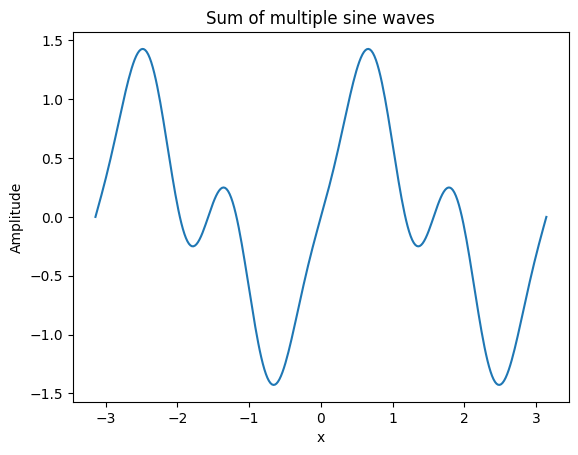

In [91]:
import matplotlib.pyplot as plt

x_vals = np.linspace(-np.pi, np.pi, 300)
df_wave = pd.DataFrame({'x': x_vals})

# Use lambda to formulate a complex wave
df_wave['wave'] = df_wave['x'].apply(
    lambda x: np.sin(2*x) + 0.5*np.sin(4*x) - 0.3*np.sin(6*x)
)

plt.plot(df_wave['x'], df_wave['wave'])
plt.title('Sum of multiple sine waves')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.show()

**Student Activity:**  
*Now you try* — change coefficients or add more sine terms to create your own wave pattern.

---

# Final thoughts: Putting it all together

- You can reshape, split, merge, and concatenate messy datasets into tidy formats.  
- Lambdas help you craft custom math features.  
- Converting between pandas and numpy provides flexibility but keep an eye on array shapes!  
- Visualizations can help you interpret complex, combined signals.

**Your challenge:**  
- Take any messy dataset and attempt all these transformations.  
- Practice creating tidy data for analysis.

---

# End of demo!

Master these steps to handle practical data challenges. Remember the core principles: each variable in a column, each observation in a row, and related variables kept in logical tables.